In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm


In [2]:
df=pd.read_csv('Big_Cities_Health_Data_Inventory.csv')
df.rename(columns = {'Race/ Ethnicity':'Race'}, inplace = True)
df.head

<bound method NDFrame.head of       Indicator Category                                          Indicator  \
0               HIV/AIDS           AIDS Diagnoses Rate (Per 100,000 people)   
1               HIV/AIDS           AIDS Diagnoses Rate (Per 100,000 people)   
2               HIV/AIDS           AIDS Diagnoses Rate (Per 100,000 people)   
3                 Cancer  All Types of Cancer Mortality Rate (Age-Adjust...   
4                 Cancer  All Types of Cancer Mortality Rate (Age-Adjust...   
...                  ...                                                ...   
13507        Food Safety  Rate of Laboratory Confirmed Infections Caused...   
13508        Food Safety  Rate of Laboratory Confirmed Infections Caused...   
13509        Food Safety  Rate of Laboratory Confirmed Infections Caused...   
13510        Food Safety  Rate of Laboratory Confirmed Infections Caused...   
13511        Food Safety  Rate of Laboratory Confirmed Infections Caused...   

       Year  Gender R

In [3]:
import statsmodels.formula.api as smf
#filter for cities that have at least three data points for lung cancer mortality arte 
cities=df['Place'].unique()
cities_filtered=[]
for city in cities: 
    mortality_2012= (df['Indicator']=="Lung Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)") & \
    (df['Year']=='2012') & (df['Place']==city)
    mortality_2013= (df['Indicator']=="Lung Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)") & \
    (df['Year']=='2013') & (df['Place']==city)
    mortality_2011= (df['Indicator']=="Lung Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)") & \
    (df['Year']=='2011') & (df['Place']==city)
    if mortality_2012.any() and mortality_2013.any() and mortality_2011.any():
        cities_filtered.append(city)

#filter dataframe by city and indicator 
df2 = df[df['Place'].isin(cities_filtered)] 
df2=df2[df2['Indicator']=="Lung Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)"]
df2['Year']=df2['Year'].astype(int)

#only using place and year as independent variables 
model = smf.ols(formula = 'Value ~ C(Place)+C(Year)',data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     11.29
Date:                Sun, 15 May 2022   Prob (F-statistic):           6.60e-25
Time:                        22:06:40   Log-Likelihood:                -1362.9
No. Observations:                 333   AIC:                             2764.
Df Residuals:                     314   BIC:                             2836.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      38.8389      5.268      7.373      0.000      28.474      49.204
C(Place)[T.Chicago, IL]                         3.8924      4.860      0.801      0.424      -5.669      13.454
C(Place)[T.Denver, CO]                          1.7306      4.954      0.349      0.727      -8.017      11.478
C(Place)[T.Detroit, MI]                        20.1800      5.450      3.703      0.000       9.456      30.904
C(Place)[T.Kansas City, MO]                    17.7800      5.450      3.262      0.001       7.056      28.504
C(Place)[T.Las Vegas (Clark County), NV]        6.1933      5.046      1.227      0.221      -3.735      16.122
C(Place)[T.Long Beach, CA]                     -8.1681      4.920     -1.660      0.098     -17.849       1.512
C(Place)[T.Miami (Miami-Dade County), FL]      -7.0485      4.880     -1.444      0.150     -16.650       2.553
C(Place)[T.New York, NY]                       -6.3305      5.046     -1.255      0.211     -16.259       3.598
C(Place)[T.Phoenix, AZ]                       -20.4851      4.649     -4.407      0.000     -29.632     -11.338
C(Place)[T.Portland (Multnomah County), OR]     2.8600      4.913      0.582      0.561      -6.806      12.526
C(Place)[T.Sacramento, CA]                     23.4767      5.218      4.499      0.000      13.209      33.744
C(Place)[T.San Antonio, TX]                    -7.4305      5.046     -1.473      0.142     -17.359       2.498
C(Place)[T.San Jose, CA]                       -8.0511      5.218     -1.543      0.124     -18.318       2.216
C(Place)[T.Seattle, WA]                        -3.9122      5.218     -0.750      0.454     -14.179       6.355
C(Year)[T.2011]                                 0.3849      3.797      0.101      0.919      -7.087       7.857
C(Year)[T.2012]                                -0.1746      3.788     -0.046      0.963      -7.629       7.279
C(Year)[T.2013]                                 0.0930      3.797      0.024      0.980      -7.379       7.565
C(Year)[T.2014]                                -2.9722      5.672     -0.524      0.601     -14.132       8.187
==============================================================================
Omnibus:                      127.024   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1219.924
Skew:                           1.293   Prob(JB):                    1.25e-265
Kurtosis:                      12.013   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
#with no additional indicators, but adding race and gender 
new_model = smf.ols(formula = 'Value ~ C(Place)+C(Year)+C(Race)+C(Gender)',data=df2).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     19.71
Date:                Sun, 15 May 2022   Prob (F-statistic):           9.50e-52
Time:                        22:06:40   Log-Likelihood:                -1277.8
No. Observations:                 333   AIC:                             2612.
Df Residuals:                     305   BIC:                             2718.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      35.6907      4.416      8.082      0.000      27.001      44.381
C(Place)[T.Chicago, IL]                         8.8986      3.850      2.311      0.021       1.323      16.474
C(Place)[T.Denver, CO]                          6.7567      3.940      1.715      0.087      -0.996      14.509
C(Place)[T.Detroit, MI]                        20.1800      4.284      4.711      0.000      11.750      28.610
C(Place)[T.Kansas City, MO]                    17.7800      4.284      4.150      0.000       9.350      26.210
C(Place)[T.Las Vegas (Clark County), NV]       11.8160      4.032      2.931      0.004       3.883      19.749
C(Place)[T.Long Beach, CA]                     -3.0873      3.897     -0.792      0.429     -10.755       4.581
C(Place)[T.Miami (Miami-Dade County), FL]      -3.7120      3.851     -0.964      0.336     -11.291       3.867
C(Place)[T.New York, NY]                       -1.2395      3.995     -0.310      0.757      -9.101       6.622
C(Place)[T.Phoenix, AZ]                       -13.3583      3.783     -3.532      0.000     -20.801      -5.915
C(Place)[T.Portland (Multnomah County), OR]     7.8524      3.926      2.000      0.046       0.128      15.577
C(Place)[T.Sacramento, CA]                     28.8349      4.148      6.952      0.000      20.673      36.997
C(Place)[T.San Antonio, TX]                    -1.8079      4.032     -0.448      0.654      -9.741       6.125
C(Place)[T.San Jose, CA]                       -1.4803      4.148     -0.357      0.721      -9.642       6.682
C(Place)[T.Seattle, WA]                        -1.3852      4.120     -0.336      0.737      -9.493       6.722
C(Year)[T.2011]                                 0.0039      2.988      0.001      0.999      -5.876       5.884
C(Year)[T.2012]                                -0.4294      2.979     -0.144      0.885      -6.292       5.433
C(Year)[T.2013]                                -0.2880      2.988     -0.096      0.923      -6.168       5.592
C(Year)[T.2014]                                -3.2706      4.459     -0.733      0.464     -12.046       5.505
C(Race)[T.Asian/PI]                           -11.6752      2.814     -4.148      0.000     -17.213      -6.137
C(Race)[T.Black]                                7.2756      2.433      2.990      0.003       2.488      12.063
C(Race)[T.Hispanic]                           -16.9870      2.602     -6.528      0.000     -22.107     -11.867
C(Race)[T.Multiracial]                        -15.7040      6.431     -2.442      0.015     -28.359      -3.049
C(Race)[T.Native American]                     -0.8158      4.457     -0.183      0.855      -9.587       7.955
C(Race)[T.Other]                              -15.3971     

In [5]:
#model for lung cancer with place, year, race, gender, and smoking as features  
df2 = df[df['Place'].isin(cities_filtered)] 
df2_new = df2.merge(df2, how='inner', left_on=['Place', 'Gender', 'Year', 'Race'], right_on=['Place', 'Gender', 'Year', 'Race'])
df2_new=df2_new[(df2_new['Indicator_x']=='Lung Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)')&(df2_new['Indicator_y']=='Percent of Adults Who Currently Smoke')]
model2 = smf.ols(formula = 'Value_x ~ C(Place)+C(Year)+C(Race)+C(Gender)+Value_y',data=df2_new).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Value_x   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     29.88
Date:                Sun, 15 May 2022   Prob (F-statistic):           3.67e-36
Time:                        22:06:40   Log-Likelihood:                -394.85
No. Observations:                 135   AIC:                             831.7
Df Residuals:                     114   BIC:                             892.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    30.7702      3.276      9.392      0.000      24.280      37.260
C(Place)[T.Chicago, IL]                       5.2539      2.493      2.108      0.037       0.316      10.192
C(Place)[T.Denver, CO]                       -2.4476      1.940     -1.262      0.210      -6.291       1.395
C(Place)[T.Las Vegas (Clark County), NV]      7.8333      1.842      4.252      0.000       4.184      11.482
C(Place)[T.Long Beach, CA]                   -3.3643      5.208     -0.646      0.520     -13.681       6.952
C(Place)[T.Miami (Miami-Dade County), FL]    -3.4102      2.251     -1.515      0.132      -7.869       1.048
C(Place)[T.New York, NY]                     -2.4454      1.698     -1.441      0.152      -5.808       0.918
C(Place)[T.Phoenix, AZ]                      -9.9196      2.077     -4.775      0.000     -14.035      -5.805
C(Place)[T.San Antonio, TX]                  -3.4362      2.649     -1.297      0.197      -8.685       1.812
C(Place)[T.San Jose, CA]                     -1.4484      2.530     -0.572      0.568      -6.461       3.564
C(Place)[T.Seattle, WA]                       0.0764      1.841      0.042      0.967      -3.570       3.723
C(Year)[T.2011]                              -4.0372      2.174     -1.857      0.066      -8.345       0.270
C(Year)[T.2012]                              -4.8793      2.342     -2.084      0.039      -9.518      -0.241
C(Year)[T.2013]                              -5.7758      2.155     -2.680      0.008     -10.045      -1.506
C(Race)[T.Asian/PI]                          -4.2229      2.269     -1.861      0.065      -8.717       0.271
C(Race)[T.Black]                              6.6360      1.663      3.991      0.000       3.342       9.930
C(Race)[T.Hispanic]                         -11.8347      1.657     -7.143      0.000     -15.117      -8.553
C(Race)[T.White]                              3.0131      1.450      2.078      0.040       0.140       5.886
C(Gender)[T.Female]                          -4.3436      1.531     -2.837      0.005      -7.377      -1.310
C(Gender)[T.Male]                             6.8564      1.535      4.466      0.000       3.815       9.898
Value_y                                       0.6345      0.150      4.230      0.000       0.337       0.932
==============================================================================
Omnibus:                        3.595   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                4.038
Skew:                          -0.089   Prob(JB):                        0.133
Kurtosis:                       3.828   Cond. No.                         237.
================================================

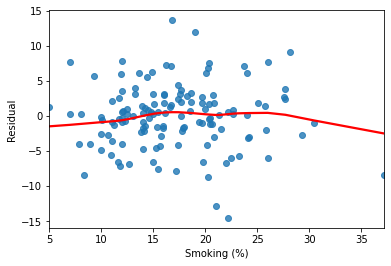

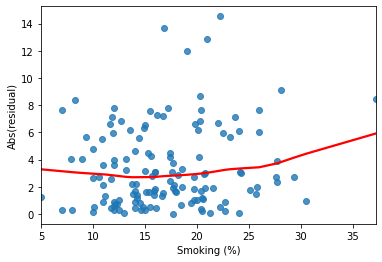

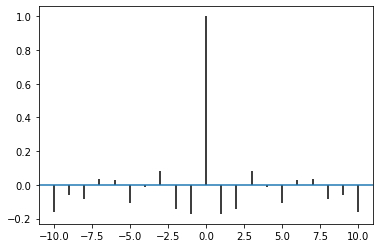

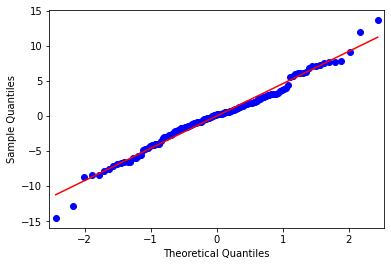

In [6]:
#checking assumptions of the final model, including smoking 

#plot residuals of fitted model 
residuals=model2.resid
plot1=sns.regplot(df2_new['Value_y'],residuals, lowess=True, line_kws={"color": "red"})
plot1.set_xlabel("Smoking (%)")
plot1.set_ylabel('Residual')
plt.show()
plt.show()

#plot absolute value of residuals 
plot1_abs=sns.regplot(df2_new['Value_y'], abs(residuals), lowess=True, line_kws={"color": "red"})
plot1_abs.set_xlabel("Smoking (%)")
plot1_abs.set_ylabel('Abs(residual)')
plt.show()

#plot autocorrelation of residuals
plt.acorr(residuals)
plt.show()

#normal Q-Q plot of residuals 
sm.qqplot(residuals, line="r") #qqplot
plt.show() # Statsmodels will produce two plots unless you add this

In [7]:
#filter for cities that have at least three data points on heart disease mrotality 
cities_filtered=[]
for city in cities: 
    mortality_2012= (df['Indicator']=="Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)") & \
    (df['Year']=='2012') & (df['Place']==city)
    mortality_2013= (df['Indicator']=="Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)") & \
    (df['Year']=='2013') & (df['Place']==city)
    mortality_2011= (df['Indicator']=="Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)") & \
    (df['Year']=='2011') & (df['Place']==city)
    if mortality_2012.any() and mortality_2013.any() and mortality_2011.any():
        cities_filtered.append(city)

#model for heart disease with year, place, race, and gender as categorical variables 
df3 = df[df['Place'].isin(cities_filtered)] 
df3=df3[df3['Indicator']=="Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)"]
df3['Year']=df3['Year'].astype(int)
model3 = smf.ols(formula = 'Value ~ C(Place)+C(Year)+C(Race)+C(Gender)',data=df3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     26.01
Date:                Sun, 15 May 2022   Prob (F-statistic):           8.91e-63
Time:                        22:06:41   Log-Likelihood:                -1729.1
No. Observations:                 337   AIC:                             3512.
Df Residuals:                     310   BIC:                             3615.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     148.6232     16.031      9.271      0.000     117.080     180.166
C(Place)[T.Chicago, IL]                        49.3219     13.992      3.525      0.000      21.790      76.853
C(Place)[T.Denver, CO]                         29.5402     14.059      2.101      0.036       1.877      57.203
C(Place)[T.Kansas City, MO]                     6.8006     14.964      0.454      0.650     -22.644      36.245
C(Place)[T.Las Vegas (Clark County), NV]       47.5785     14.595      3.260      0.001      18.860      76.297
C(Place)[T.Long Beach, CA]                     38.9123     14.165      2.747      0.006      11.040      66.785
C(Place)[T.Miami (Miami-Dade County), FL]      18.3942     13.998      1.314      0.190      -9.150      45.938
C(Place)[T.New York, NY]                       37.2531     14.523      2.565      0.011       8.677      65.829
C(Place)[T.Phoenix, AZ]                       -57.6959     13.627     -4.234      0.000     -84.509     -30.883
C(Place)[T.Portland (Multnomah County), OR]    -9.8417     14.239     -0.691      0.490     -37.859      18.176
C(Place)[T.Sacramento, CA]                    126.2353     14.307      8.823      0.000      98.085     154.386
C(Place)[T.San Antonio, TX]                    -1.0977     14.595     -0.075      0.940     -29.816      27.621
C(Place)[T.San Jose, CA]                      -11.4755     14.523     -0.790      0.430     -40.052      17.101
C(Place)[T.Seattle, WA]                       -17.3469     14.523     -1.194      0.233     -45.923      11.229
C(Year)[T.2011]                                -0.1240     10.801     -0.011      0.991     -21.377      21.129
C(Year)[T.2012]                                -0.0087     10.805     -0.001      0.999     -21.268      21.251
C(Year)[T.2013]                                -4.4562     10.805     -0.412      0.680     -25.716      16.803
C(Year)[T.2014]                                -3.8047     16.196     -0.235      0.814     -35.672      28.063
C(Race)[T.Asian/PI]                           -62.8280     10.151     -6.190      0.000     -82.801     -42.855
C(Race)[T.Black]                               40.6553      8.802      4.619      0.000      23.335      57.975
C(Race)[T.Hispanic]                           -50.7641      8.981     -5.653      0.000     -68.435     -33.093
C(Race)[T.Multiracial]                        -72.4801     23.323     -3.108      0.002    -118.372     -26.588
C(Race)[T.Native American]                    -58.4552     14.329     -4.079      0.000     -86.650     -30.261
C(Race)[T.Other]                              -38.0059     14.360     -2.647      0.009     -66.262      -9.750
C(Race)[T.White]                               21.7170     

In [8]:
#model for heart disease with place, year, race, gender, and obesity as features 
new_df=df[['Place', 'Gender', 'Year', 'Race', 'Indicator', 'Value']]
df_cities=df[df['Place'].isin(cities_filtered)] 
df_obesity=new_df[new_df['Indicator']=='Percent of Adults Who Are Obese']
df_heart_disease=df_cities[df_cities['Indicator']=="Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)"]
heart_df=df_heart_disease.merge(df_obesity, how='inner', left_on=['Place', 'Gender', 'Year', 'Race'], right_on=['Place', 'Gender', 'Year', 'Race'])
model4 = smf.ols(formula = 'Value_x ~ C(Place)+C(Year)+C(Race)+C(Gender)+Value_y',data=heart_df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Value_x   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     26.76
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.49e-34
Time:                        22:06:41   Log-Likelihood:                -605.66
No. Observations:                 136   AIC:                             1255.
Df Residuals:                     114   BIC:                             1319.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   125.8514     21.826      5.766      0.000      82.614     169.089
C(Place)[T.Chicago, IL]                      50.2706     10.246      4.907      0.000      29.974      70.567
C(Place)[T.Denver, CO]                       14.2031      8.035      1.768      0.080      -1.713      30.119
C(Place)[T.Las Vegas (Clark County), NV]     40.7648     12.028      3.389      0.001      16.937      64.592
C(Place)[T.Long Beach, CA]                   36.3983     24.070      1.512      0.133     -11.283      84.080
C(Place)[T.Miami (Miami-Dade County), FL]    19.5132     10.221      1.909      0.059      -0.734      39.761
C(Place)[T.New York, NY]                     30.6211      7.925      3.864      0.000      14.922      46.321
C(Place)[T.Phoenix, AZ]                     -53.6287      8.521     -6.294      0.000     -70.509     -36.749
C(Place)[T.San Antonio, TX]                   3.9386     14.347      0.275      0.784     -24.482      32.359
C(Place)[T.San Jose, CA]                    -14.2570     11.041     -1.291      0.199     -36.129       7.615
C(Place)[T.Seattle, WA]                     -22.7877      7.857     -2.900      0.004     -38.353      -7.222
C(Year)[T.2011]                               2.6857     10.591      0.254      0.800     -18.296      23.667
C(Year)[T.2012]                               0.9780     11.565      0.085      0.933     -21.932      23.887
C(Year)[T.2013]                              -2.9115     10.661     -0.273      0.785     -24.030      18.207
C(Race)[T.Asian/PI]                         -27.4998     13.266     -2.073      0.040     -53.779      -1.221
C(Race)[T.Black]                             35.0056      9.271      3.776      0.000      16.640      53.372
C(Race)[T.Hispanic]                         -47.2994      7.779     -6.081      0.000     -62.709     -31.890
C(Race)[T.Other]                            -52.4207     25.139     -2.085      0.039    -102.220      -2.621
C(Race)[T.White]                             12.8057      7.470      1.714      0.089      -1.993      27.604
C(Gender)[T.Female]                         -32.2471      6.865     -4.698      0.000     -45.846     -18.648
C(Gender)[T.Male]                            43.7852      6.866      6.377      0.000      30.183      57.388
Value_y                                       1.0423      0.628      1.659      0.100      -0.203       2.287
==============================================================================
Omnibus:                       23.132   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.090
Skew:                           0.698   Prob(JB):                     1.33e-11
Kurtosis:        

In [9]:
#model for heart disease with place, year, race, gender, and physical activity as features 
physical_activity_df=new_df[new_df['Indicator']=='Percent of Adults Who Meet CDC-Recommended Physical Activity Levels']
heart_df2=df_heart_disease.merge(physical_activity_df, how='inner', left_on=['Place', 'Gender', 'Year', 'Race'], right_on=['Place', 'Gender', 'Year', 'Race'])
new_model4 = smf.ols(formula = 'Value_x ~ C(Place)+C(Year)+C(Race)+C(Gender)+Value_y',data=heart_df2).fit()
new_model4.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Value_x   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sun, 15 May 2022   Prob (F-statistic):           3.88e-18
Time:                        22:06:41   Log-Likelihood:                -332.76
No. Observations:                  77   AIC:                             705.5
Df Residuals:                      57   BIC:                             752.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  161.7832     23.062      7.015      0.000     115.602     207.964
C(Place)[T.Chicago, IL]                     64.9320     23.880      2.719      0.009      17.114     112.750
C(Place)[T.Denver, CO]                      37.9012     47.987      0.790      0.433     -58.192     133.994
C(Place)[T.Las Vegas (Clark County), NV]    49.3646     19.169      2.575      0.013      10.980      87.749
C(Place)[T.Long Beach, CA]                  41.5022     24.029      1.727      0.090      -6.614      89.619
C(Place)[T.New York, NY]                    48.9705     36.977      1.324      0.191     -25.074     123.015
C(Place)[T.Phoenix, AZ]                    -38.1873     22.884     -1.669      0.101     -84.012       7.637
C(Place)[T.San Antonio, TX]                  1.4122     25.416      0.056      0.956     -49.483      52.307
C(Place)[T.San Jose, CA]                    -0.4197     27.785     -0.015      0.988     -56.059      55.219
C(Place)[T.Seattle, WA]                     -2.7145     31.950     -0.085      0.933     -66.694      61.265
C(Year)[T.2012]                             -1.9301     10.919     -0.177      0.860     -23.795      19.935
C(Year)[T.2013]                             -2.6757      6.687     -0.400      0.691     -16.065      10.714
C(Race)[T.Asian/PI]                        -50.5468     14.129     -3.578      0.001     -78.839     -22.254
C(Race)[T.Black]                            47.9544      9.338      5.136      0.000      29.256      66.653
C(Race)[T.Hispanic]                        -47.0014     10.787     -4.357      0.000     -68.601     -25.401
C(Race)[T.Other]                           -54.7118     23.941     -2.285      0.026    -102.654      -6.770
C(Race)[T.White]                             7.7108      9.312      0.828      0.411     -10.936      26.358
C(Gender)[T.Female]                        -33.7502      8.520     -3.961      0.000     -50.811     -16.689
C(Gender)[T.Male]                           40.9503      8.519      4.807      0.000      23.891      58.009
Value_y                                     -0.4328      0.815     -0.531      0.598      -2.065       1.200
==============================================================================
Omnibus:                        1.106   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.575   Jarque-Bera (JB):                0.654
Skew:                           0.207   Prob(JB):                        0.721
Kurtosis:                       3.181   Cond. No.                     2.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [10]:
cities=df['Place'].unique()
cities_filtered=[]
for city in cities: 
    mortality_2012= (df['Indicator']=="Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)") & \
    (df['Year']=='2012') & (df['Place']==city)
    mortality_2013= (df['Indicator']=="Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)") & \
    (df['Year']=='2013') & (df['Place']==city)
    mortality_2011= (df['Indicator']=="Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)") & \
    (df['Year']=='2011') & (df['Place']==city)
    if mortality_2012.any() and mortality_2013.any() and mortality_2011.any():
        cities_filtered.append(city)
df_cities=df[df['Place'].isin(cities_filtered)] 
df_diabetes=df_cities[df_cities['Indicator']=="Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)"]
model5_original= smf.ols(formula = 'Value ~ C(Place)+C(Year)+C(Race)+C(Gender)',data=df_diabetes).fit()
model5_original.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     16.76
Date:                Sun, 15 May 2022   Prob (F-statistic):           2.09e-45
Time:                        22:06:41   Log-Likelihood:                -1205.7
No. Observations:                 332   AIC:                             2467.
Df Residuals:                     304   BIC:                             2574.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      16.4158      3.569      4.600      0.000       9.393      23.439
C(Place)[T.Chicago, IL]                         6.2361      3.075      2.028      0.043       0.185      12.288
C(Place)[T.Denver, CO]                          9.0193      3.170      2.845      0.005       2.782      15.257
C(Place)[T.Kansas City, MO]                     5.8717      3.436      1.709      0.088      -0.890      12.633
C(Place)[T.Las Vegas (Clark County), NV]       -3.0509      3.219     -0.948      0.344      -9.384       3.283
C(Place)[T.Long Beach, CA]                      0.8620      3.108      0.277      0.782      -5.255       6.979
C(Place)[T.Miami (Miami-Dade County), FL]       4.5066      3.072      1.467      0.143      -1.539      10.552
C(Place)[T.New York, NY]                        3.1995      3.196      1.001      0.318      -3.090       9.489
C(Place)[T.Phoenix, AZ]                        -1.8526      3.005     -0.617      0.538      -7.765       4.060
C(Place)[T.Portland (Multnomah County), OR]    11.5048      3.142      3.662      0.000       5.322      17.688
C(Place)[T.Sacramento, CA]                     19.1804      3.196      6.001      0.000      12.891      25.470
C(Place)[T.San Antonio, TX]                     7.6681      3.219      2.382      0.018       1.335      14.002
C(Place)[T.San Jose, CA]                       18.2661      3.196      5.715      0.000      11.977      24.556
C(Place)[T.Seattle, WA]                         8.0506      3.226      2.496      0.013       1.702      14.399
C(Year)[T.2011]                                 0.1814      2.420      0.075      0.940      -4.580       4.943
C(Year)[T.2012]                                 1.3004      2.420      0.537      0.591      -3.463       6.063
C(Year)[T.2013]                                -0.7995      2.420     -0.330      0.741      -5.562       3.963
C(Year)[T.2014]                                 0.7679      3.548      0.216      0.829      -6.213       7.749
C(Race)[T.American Indian/Alaska Native]      -17.6404      5.264     -3.351      0.001     -28.000      -7.281
C(Race)[T.Asian/PI]                            -4.9976      2.262     -2.209      0.028      -9.449      -0.546
C(Race)[T.Black]                               18.8117      1.933      9.732      0.000      15.008      22.615
C(Race)[T.Hispanic]                             1.6066      2.057      0.781      0.435      -2.440       5.654
C(Race)[T.Multiracial]                        -11.7338      5.223     -2.246      0.025     -22.012      -1.455
C(Race)[T.Native American]                     25.7481      3.805      6.767      0.000      18.261      33.236
C(Race)[T.Other]                               -8.7446     

In [11]:
#diabetes model with place, year, race, gender, and obesity as features 
diabetes_df=df_diabetes.merge(df_obesity, how='inner', left_on=['Place', 'Gender', 'Year', 'Race'], right_on=['Place', 'Gender', 'Year', 'Race'])
model5 = smf.ols(formula = 'Value_x ~ C(Place)+C(Year)+C(Race)+C(Gender)+Value_y',data=diabetes_df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Value_x   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     12.67
Date:                Sun, 15 May 2022   Prob (F-statistic):           6.66e-21
Time:                        22:06:41   Log-Likelihood:                -421.73
No. Observations:                 135   AIC:                             887.5
Df Residuals:                     113   BIC:                             951.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    11.5301      5.780      1.995      0.048       0.078      22.982
C(Place)[T.Chicago, IL]                       4.8916      2.713      1.803      0.074      -0.484      10.267
C(Place)[T.Denver, CO]                        5.0556      2.128      2.375      0.019       0.839       9.272
C(Place)[T.Las Vegas (Clark County), NV]     -5.6151      3.191     -1.760      0.081     -11.938       0.707
C(Place)[T.Long Beach, CA]                    1.0410      6.374      0.163      0.871     -11.588      13.670
C(Place)[T.Miami (Miami-Dade County), FL]     3.9706      2.707      1.467      0.145      -1.392       9.333
C(Place)[T.New York, NY]                      2.2777      2.099      1.085      0.280      -1.881       6.436
C(Place)[T.Phoenix, AZ]                       1.6914      2.257      0.749      0.455      -2.781       6.164
C(Place)[T.San Antonio, TX]                   3.3920      3.799      0.893      0.374      -4.135      10.919
C(Place)[T.San Jose, CA]                     16.2577      2.924      5.560      0.000      10.465      22.051
C(Place)[T.Seattle, WA]                       7.5733      2.098      3.610      0.000       3.416      11.730
C(Year)[T.2011]                              -0.2461      2.805     -0.088      0.930      -5.803       5.311
C(Year)[T.2012]                               1.0373      3.070      0.338      0.736      -5.044       7.119
C(Year)[T.2013]                              -1.1554      2.823     -0.409      0.683      -6.748       4.438
C(Race)[T.Asian/PI]                          -1.8302      3.514     -0.521      0.604      -8.792       5.132
C(Race)[T.Black]                             15.9107      2.455      6.481      0.000      11.047      20.775
C(Race)[T.Hispanic]                           4.0964      2.087      1.963      0.052      -0.039       8.231
C(Race)[T.Other]                              3.0927      6.657      0.465      0.643     -10.096      16.282
C(Race)[T.White]                             -4.1465      1.978     -2.096      0.038      -8.066      -0.227
C(Gender)[T.Female]                          -3.1388      1.818     -1.727      0.087      -6.740       0.463
C(Gender)[T.Male]                             3.9579      1.818      2.177      0.032       0.356       7.560
Value_y                                       0.2445      0.166      1.469      0.145      -0.085       0.574
==============================================================================
Omnibus:                       47.402   Durbin-Watson:                   1.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.205
Skew:                           1.144   Prob(JB):                     5.05e-47
Kurtosis:        

In [12]:
#diabetes model with place, year, race, gender, and physical activity as features 
diabetes_df2=df_diabetes.merge(physical_activity_df, how='inner', left_on=['Place', 'Gender', 'Year', 'Race'], right_on=['Place', 'Gender', 'Year', 'Race'])
model6 = smf.ols(formula = 'Value_x ~ C(Place)+C(Year)+C(Race)+C(Gender)+Value_y',data=diabetes_df2).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Value_x   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     7.139
Date:                Sun, 15 May 2022   Prob (F-statistic):           3.43e-09
Time:                        22:06:41   Log-Likelihood:                -232.37
No. Observations:                  77   AIC:                             504.7
Df Residuals:                      57   BIC:                             551.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   23.6204      6.261      3.772      0.000      11.082      36.159
C(Place)[T.Chicago, IL]                      7.7329      6.483      1.193      0.238      -5.250      20.716
C(Place)[T.Denver, CO]                      12.6416     13.029      0.970      0.336     -13.448      38.731
C(Place)[T.Las Vegas (Clark County), NV]    -3.0374      5.204     -0.584      0.562     -13.459       7.384
C(Place)[T.Long Beach, CA]                   0.2111      6.524      0.032      0.974     -12.853      13.275
C(Place)[T.New York, NY]                     9.5030     10.039      0.947      0.348     -10.600      29.606
C(Place)[T.Phoenix, AZ]                      4.7175      6.213      0.759      0.451      -7.724      17.159
C(Place)[T.San Antonio, TX]                  6.4569      6.901      0.936      0.353      -7.361      20.275
C(Place)[T.San Jose, CA]                    20.2775      7.544      2.688      0.009       5.171      35.384
C(Place)[T.Seattle, WA]                      9.0152      8.675      1.039      0.303      -8.356      26.386
C(Year)[T.2012]                              1.8720      2.965      0.631      0.530      -4.064       7.808
C(Year)[T.2013]                             -1.5097      1.815     -0.832      0.409      -5.145       2.126
C(Race)[T.Asian/PI]                         -5.5087      3.836     -1.436      0.156     -13.190       2.173
C(Race)[T.Black]                            12.6759      2.535      5.000      0.000       7.599      17.753
C(Race)[T.Hispanic]                          6.9053      2.929      2.358      0.022       1.041      12.770
C(Race)[T.Other]                            -5.8362      6.500     -0.898      0.373     -18.853       7.180
C(Race)[T.White]                            -4.0531      2.528     -1.603      0.114      -9.116       1.010
C(Gender)[T.Female]                         -3.1689      2.313     -1.370      0.176      -7.801       1.463
C(Gender)[T.Male]                            3.5398      2.313      1.530      0.131      -1.092       8.171
Value_y                                     -0.1760      0.221     -0.795      0.430      -0.619       0.267
==============================================================================
Omnibus:                       14.251   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               43.490
Skew:                           0.360   Prob(JB):                     3.60e-10
Kurtosis:                       6.611   Cond. No.                     2.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [13]:
#diabetes model with place, year, race, gender, and poverty as features 
poverty_df=new_df[new_df['Indicator']=='Percent Below 200% Poverty Level']
diabetes_df3=df_diabetes.merge(poverty_df, how='inner', left_on=['Place', 'Gender', 'Year', 'Race'], right_on=['Place', 'Gender', 'Year', 'Race'])
model7 = smf.ols(formula = 'Value_x ~ C(Place)+C(Year)+C(Race)+C(Gender)+Value_y',data=diabetes_df3).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Value_x   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     16.02
Date:                Sun, 15 May 2022   Prob (F-statistic):           2.51e-05
Time:                        22:06:41   Log-Likelihood:                -49.394
No. Observations:                  26   AIC:                             128.8
Df Residuals:                      11   BIC:                             147.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       5.7155     32.769      0.174      0.865     -66.408      77.839
C(Place)[T.Chicago, IL]                         5.3077      2.655      1.999      0.071      -0.537      11.152
C(Place)[T.Denver, CO]                          4.0557      4.447      0.912      0.381      -5.732      13.844
C(Place)[T.Kansas City, MO]                     7.0169      3.245      2.162      0.054      -0.126      14.160
C(Place)[T.Las Vegas (Clark County), NV]       -4.3140      3.657     -1.180      0.263     -12.363       3.735
C(Place)[T.Miami (Miami-Dade County), FL]      -0.8575     11.046     -0.078      0.940     -25.170      23.455
C(Place)[T.New York, NY]                        3.5847      3.107      1.154      0.273      -3.253      10.422
C(Place)[T.Phoenix, AZ]                         2.2777      3.630      0.628      0.543      -5.711      10.267
C(Place)[T.Portland (Multnomah County), OR]     9.1904      6.081      1.511      0.159      -4.193      22.574
C(Place)[T.Sacramento, CA]                     26.2159      2.880      9.104      0.000      19.878      32.554
C(Place)[T.San Antonio, TX]                     4.2268      2.509      1.685      0.120      -1.296       9.749
C(Place)[T.San Jose, CA]                       16.5575     11.046      1.499      0.162      -7.755      40.870
C(Place)[T.Seattle, WA]                         6.4422     12.867      0.501      0.626     -21.879      34.763
C(Year)[T.2013]                                 0.5963      1.252      0.476      0.643      -2.159       3.352
Value_y                                         0.2739      0.745      0.368      0.720      -1.365       1.913
==============================================================================
Omnibus:                        1.232   Durbin-Watson:                   2.739
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                0.273
Skew:                           0.000   Prob(JB):                        0.873
Kurtosis:                       3.502   Cond. No.                     3.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#using median household income as a feature 
income_df=new_df[new_df['Indicator']=='Median Household Income (Dollars)']
diabetes_df4=df_diabetes.merge(income_df, how='inner', left_on=['Place', 'Gender', 'Year', 'Race'], right_on=['Place', 'Gender', 'Year', 'Race'])
model8 = smf.ols(formula = 'Value_x ~ C(Place)+C(Year)+C(Race)+C(Gender)+Value_y',data=diabetes_df4).fit()
model8.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Value_x   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     13.29
Date:                Sun, 15 May 2022   Prob (F-statistic):           0.000244
Time:                        22:06:42   Log-Likelihood:                -45.473
No. Observations:                  24   AIC:                             120.9
Df Residuals:                       9   BIC:                             138.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      37.2319     30.746      1.211      0.257     -32.320     106.784
C(Place)[T.Chicago, IL]                         5.5127      2.637      2.091      0.066      -0.452      11.477
C(Place)[T.Denver, CO]                          4.5560      3.912      1.165      0.274      -4.294      13.406
C(Place)[T.Kansas City, MO]                     5.0617      3.217      1.573      0.150      -2.216      12.339
C(Place)[T.Las Vegas (Clark County), NV]       -4.0145      4.976     -0.807      0.441     -15.271       7.242
C(Place)[T.Miami (Miami-Dade County), FL]       0.2800      4.311      0.065      0.950      -9.473      10.033
C(Place)[T.New York, NY]                        5.0875      4.310      1.180      0.268      -4.662      14.837
C(Place)[T.Phoenix, AZ]                         2.7773      2.730      1.017      0.335      -3.397       8.952
C(Place)[T.Portland (Multnomah County), OR]     9.5473      4.574      2.087      0.066      -0.799      19.894
C(Place)[T.Sacramento, CA]                     27.5308      2.897      9.503      0.000      20.977      34.084
C(Place)[T.San Antonio, TX]                     3.9137      2.715      1.442      0.183      -2.228      10.055
C(Place)[T.San Jose, CA]                       27.2558     23.036      1.183      0.267     -24.856      79.367
C(Place)[T.Seattle, WA]                        10.7709     14.253      0.756      0.469     -21.471      43.013
C(Year)[T.2013]                                 1.3349      1.564      0.854      0.415      -2.203       4.873
Value_y                                        -0.0004      0.001     -0.640      0.538      -0.002       0.001
==============================================================================
Omnibus:                        0.941   Durbin-Watson:                   2.829
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.127
Skew:                          -0.000   Prob(JB):                        0.938
Kurtosis:                       3.356   Cond. No.                     4.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
df['Indicator'].unique()

array(['AIDS Diagnoses Rate (Per 100,000 people)',
       'All Types of Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Infant Mortality Rate (Per 1,000 live births)',
       'All-Cause Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Life Expectancy at Birth (Years)',
       'Drug Abuse-Related Hospitalization Rate (Per 100,000 people) *Comparisons of these data are difficult as definitions can vary.',
       'Lung Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Female Breast Cancer Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Firearm Related Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'HIV Diagnoses Rate (Per 100,000 people)',
       'HIV-Related Mortality Rate (Age-Adjusted; Per 100,000 people)',
       'Homicide Rate (Age-Adjusted; Per 100,000 people)',
       'Me

In [16]:
#preventive programs
df_smoking=df[df["Indicator"]=='Percent of Adults Who Currently Smoke']
df_obesity=df[df['Indicator']=='Percent of Adults Who Are Obese']
df_drinking=df[df['Indicator']=='Percent of Adults Who Binge Drank']
df_smoking=df_smoking[['Race', 'Gender', 'Value', 'Place', 'Indicator', 'Year']]
df_obesity=df_obesity[['Race', 'Gender', 'Value', 'Place', 'Indicator', 'Year']]
df_drinking=df_drinking[['Race', 'Gender', 'Value', 'Place', 'Indicator', 'Year']]
series=df_drinking['Place']
df_drinking.loc[df_drinking['Value'].idxmax()]['Place']
df_smoking.nlargest(5, 'Value')

,Race,Gender,Value,Place,Indicator,Year
2358,Black,Both,37.2,"Denver, CO",Percent of Adults Who Currently Smoke,2013
12582,Multiracial,Both,31.0,"Washington, DC",Percent of Adults Who Currently Smoke,2012
12248,Black,Both,30.8,"Washington, DC",Percent of Adults Who Currently Smoke,2011
4376,Black,Both,30.5,"Las Vegas (Clark County), NV",Percent of Adults Who Currently Smoke,2011
432,Black,Both,29.4,"Baltimore, MD",Percent of Adults Who Currently Smoke,2010


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     28.83
Date:                Sun, 15 May 2022   Prob (F-statistic):           3.12e-61
Time:                        22:18:59   Log-Likelihood:                -679.31
No. Observations:                 253   AIC:                             1423.
Df Residuals:                     221   BIC:                             1536.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      22.2741      1.118     19.924      0.000      20.071      24.477
C(Place)[T.Baltimore, MD]                       8.9133      1.386      6.432      0.000       6.182      11.644
C(Place)[T.Boston, MA]                          0.2917      1.447      0.202      0.840      -2.560       3.143
C(Place)[T.Chicago, IL]                         4.9852      1.475      3.380      0.001       2.079       7.892
C(Place)[T.Denver, CO]                         -1.1564      1.332     -0.868      0.386      -3.782       1.469
C(Place)[T.Detroit, MI]                        15.8635      2.150      7.377      0.000      11.626      20.101
C(Place)[T.Fort Worth (Tarrant County), TX]     8.4592      2.460      3.439      0.001       3.611      13.307
C(Place)[T.Houston, TX]                         9.6178      1.969      4.886      0.000       5.738      13.497
C(Place)[T.Las Vegas (Clark County), NV]        5.0941      1.752      2.907      0.004       1.641       8.547
C(Place)[T.Long Beach, CA]                      2.2259      2.907      0.766      0.445      -3.503       7.955
C(Place)[T.Los Angeles, CA]                    -0.6956      1.752     -0.397      0.692      -4.149       2.757
C(Place)[T.Miami (Miami-Dade County), FL]       3.3519      1.475      2.273      0.024       0.445       6.258
C(Place)[T.Minneapolis, MN]                    -0.9741      2.907     -0.335      0.738      -6.703       4.755
C(Place)[T.New York, NY]                        2.2494      1.280      1.758      0.080      -0.273       4.771
C(Place)[T.Oakland, CA]                         2.2602      1.837      1.230      0.220      -1.360       5.881
C(Place)[T.Philadelphia, PA]                    9.2673      1.371      6.757      0.000       6.565      11.970
C(Place)[T.Phoenix, AZ]                         4.2360      1.351      3.136      0.002       1.574       6.898
C(Place)[T.San Antonio, TX]                    12.0978      1.969      6.146      0.000       8.218      15.977
C(Place)[T.San Diego County, CA]               -0.0539      1.623     -0.033      0.974      -3.252       3.144
C(Place)[T.San Jose, CA]                        1.4759      1.752      0.842      0.401      -1.977       4.929
C(Place)[T.Seattle, WA]                         0.2355      1.272      0.185      0.853      -2.271       2.742
C(Place)[T.U.S. Total]                         14.4769      1.837      7.880      0.000      10.856      18.098
C(Place)[T.Washington, DC]                     -1.0872      1.296     -0.839      0.402      -3.641       1.467
C(Race)[T.Asian/PI]                           -13.1438      1.463     -8.982      0.000     -16.028     -10.260
C(Race)[T.Black]                                9.4532     

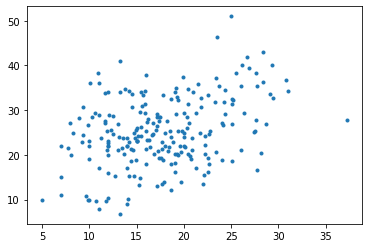

In [32]:
#pairplots 
df_filtered=df[['Race', 'Year', 'Place', 'Gender', 'Indicator', 'Value']]
df_smoking=df_filtered[df_filtered['Indicator']=='Percent of Adults Who Currently Smoke']
df_mortality=df_filtered[df_filtered['Indicator']=='All-Cause Mortality Rate (Age-Adjusted; Per 100,000 people)']
df_unhealthy=df_smoking.merge(df_obesity, how='inner', left_on=['Place', 'Gender', 'Year', 'Race'], right_on=['Place', 'Gender', 'Year', 'Race'] )
plt.plot(df_unhealthy['Value_x'], df_unhealthy['Value_y'], '.')
test_model = smf.ols(formula = 'Value ~ C(Place)+C(Race)+C(Gender)',data=df_obesity).fit()
test_model.summary()



In [18]:
# X=heart_df[['Place', 'Year', 'Race', 'Gender', 'Value_y']] 
# Yhat=model4.predict(X)
# plt.plot(heart_df['Value_x'], label="observed")
# plt.plot(Yhat, color="red", label="predicted")

In [19]:
#make a line plot using the filtered cities 
# for c in cities_filtered: 
#     df_filtered=df[(df['Indicator']=="Lung Disease Mortality Rate (Age-Adjusted; Per 100,000 people)") & \
#     (df['Place']==c) & (df['Gender']=='Both') & (df['Race']=='All')] 
#     df_filtered=df_filtered[['Year','Value']]
#     df_filtered['Year']=df_filtered['Year'].astype(int)
#     df_filtered=df_filtered.sort_values(by='Year')
#     plt.plot(df_filtered['Year'], df_filtered['Value'], label=c)
#     x_vals=range(df_filtered['Year'].min(), df_filtered['Year'].max()+1, 1)
#     plt.xticks(x_vals)
#     plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")